## 2.3 線形回帰モデル

### 2.3.2 Pytorch で線形回帰モデル （from scratch）

In [1]:
"""
テストデータを生成してパラメータを学習するための変数を準備
"""

import torch

# 真の係数
w_true = torch.Tensor([1,2,3])
print("真の係数: ", w_true)

# X のデータの準備。切片を回帰係数に含めるため、
# X の最初の次元に1を追加しておく
X = torch.cat([torch.ones(100,1), torch.randn(100,2)], 1)
print(X[:3])

# 真の係数と各 X との内積を行列とベクトルの積でまとめて計算
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
print(y[:3])

# 勾配降下で最適化するためのパラメータの Tensor を
# 乱数で初期化して作成
w = torch.randn(3, requires_grad = True)
print(w)

# 学習率
gamma = 0.1

真の係数:  tensor([1., 2., 3.])
tensor([[ 1.0000,  0.1738,  0.9267],
        [ 1.0000,  0.8472, -0.0682],
        [ 1.0000, -0.0067, -2.7809]])
tensor([ 4.6483,  2.8019, -7.3666])
tensor([ 0.3851, -0.8373, -0.7041], requires_grad=True)


In [2]:
print(X.size())
X[:10]

torch.Size([100, 3])


tensor([[ 1.0000,  0.1738,  0.9267],
        [ 1.0000,  0.8472, -0.0682],
        [ 1.0000, -0.0067, -2.7809],
        [ 1.0000, -0.1340,  0.0217],
        [ 1.0000,  1.2248, -0.4318],
        [ 1.0000,  0.3690,  0.7284],
        [ 1.0000, -0.9620,  1.6798],
        [ 1.0000, -0.2178, -0.6987],
        [ 1.0000,  0.7530, -0.2914],
        [ 1.0000, -0.9493,  0.9920]])

In [3]:
w

tensor([ 0.3851, -0.8373, -0.7041], requires_grad=True)

In [4]:
"""
勾配降下法でパラメータを最適化
"""

# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(20):
    
    # 前回の backward メソッドで計算された勾配の値を削除
    w.grad = None
    
    # 線形モデルで y の予測値を計算
    y_pred = torch.mv(X, w)
    
    # MSE loss と w による微分を計算
    loss = torch.mean((y - y_pred)**2)
    loss.backward()
    
    # 勾配を更新する
    # w をそのまま代入して更新すると異なる Tensor になって
    # 計算グラフが破壊されてしまうので data だけを更新する
    w.data = w.data - gamma * w.grad.data
    if epoc%10==0: 
        print("="*30)
        print("w:", w)
        print("y_pred:", y_pred)
        print("loss:", loss)
    
    # 収束確認のために loss を記録しておく
    losses.append(loss.item())

w: tensor([ 0.3411, -0.3446,  0.1673], requires_grad=True)
y_pred: tensor([-0.4130, -0.2763,  2.3488,  0.4820, -0.3364, -0.4368,  0.0077,  1.0594,
        -0.0402,  0.4814,  2.4179, -0.0398,  1.2670, -1.5719,  0.6958,  0.7040,
         1.9924, -1.2846,  1.1483,  0.8410,  0.2585, -0.3504,  0.6193,  0.8998,
         1.4483,  0.5597,  0.8141,  1.1119, -1.6919,  0.6459, -2.0962,  1.0690,
         0.7412, -1.1050,  2.6806, -0.7174, -0.2022, -0.1666,  1.1570,  0.7203,
         1.4627,  0.1300,  1.1406, -0.4131,  0.5169,  0.3518,  0.0349,  1.0693,
         2.2051, -0.9462, -0.9158,  1.8275,  0.7315,  0.8618,  0.1630, -1.0231,
         0.9271,  0.1940,  0.3004,  1.0965,  1.0231, -0.3555,  0.1920,  0.2781,
         2.6721, -1.2070,  1.6704, -0.7774,  0.5505,  1.6082, -0.3924,  2.7976,
         2.3962,  1.5885,  1.9533,  0.9495,  0.3789, -0.9535,  2.5010,  1.5312,
         0.8944, -0.5739,  1.4448,  0.4001,  0.4172,  0.2401,  1.3651,  1.1689,
        -1.7981, -1.0486,  2.6345,  1.5890,  2.2607, 

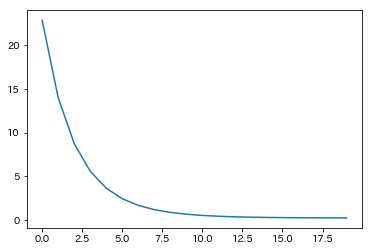

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [6]:
w  # 正しく a=(1, 2, 3) が学習できていた

tensor([0.9961, 1.8855, 2.9213], requires_grad=True)

### 2.3.3 Pytorch で線形回帰モデル （nn, optim モジュールの使用）

- 自動微分以外はスクラッチで書いた。ただし、モデルの構築や勾配降下の計算は PyTorch で実装されている。
- モデルの構築は `torch.nn`, 最適化は `torch.optim` に含まれている。

In [7]:
"""
線形回帰モデルの構築と最適化の準備
"""

from torch import nn, optim

# Linear 層を作成。今回は切片校は回帰係数に含めるので、
# 入力の次元を 3 にし、bias(切片)を False にする
net = nn.Linear(in_features = 3, out_features = 1, bias = False)

# SGD のオプティマイザーに上で定義したネットワークの
# パラメータを渡して初期化
optimizer = optim.SGD(net.parameters(), lr=0.1)

# MSE lossクラス
loss_fn = nn.MSELoss()

In [8]:
"""
最適化のイテレーションを回す
"""

# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(20):
    
    # 前回の backward メソッドで計算された勾配の値を削除
    optimizer.zero_grad()
    
    # 線形モデルで y の予測値を計算
    y_pred = net(X)
    
    # MSE loss を計算
    # y_pred は (n, 1) のような shape を持っているので (n, ) に直す必要がある
    loss = loss_fn(y_pred.view_as(y), y)
    
    # loss の w による微分を計算
    loss.backward()
    
    # 勾配を更新する
    optimizer.step()
    if epoc%10==0: 
        print("="*30)
        print("optimizer:", optimizer, "\n")
        print("y_pred:", y_pred.size(), "\n", y_pred[:10], "\n")
        print("loss:", loss, "\n")
        print("net.parameters:", list(net.parameters()))
    
    # 収束確認のために loss を記録しておく
    losses.append(loss.item())

optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
) 

y_pred: torch.Size([100, 1]) 
 tensor([[ 1.0123],
        [ 0.3182],
        [-0.9336],
        [ 0.6002],
        [ 0.0332],
        [ 0.8594],
        [ 1.6869],
        [ 0.2337],
        [ 0.2209],
        [ 1.3149]], grad_fn=<SliceBackward>) 

loss: tensor(11.3388, grad_fn=<MseLossBackward>) 

net.parameters: [Parameter containing:
tensor([[0.5317, 0.1500, 1.1099]], requires_grad=True)]
optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
) 

y_pred: torch.Size([100, 1]) 
 tensor([[ 3.6826],
        [ 2.0304],
        [-6.8488],
        [ 0.6830],
        [ 1.6404],
        [ 3.4524],
        [ 3.9153],
        [-1.4424],
        [ 1.2609],
        [ 2.0367]], grad_fn=<SliceBackward>) 

loss: tensor(0.3766, grad_fn=<MseLossBackward>) 

net.parameters: [Parameter containing:
tensor([[0.8708, 1.

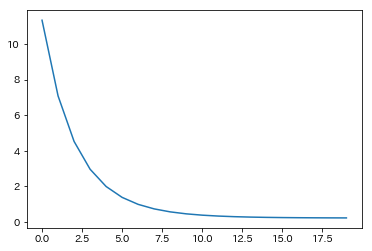

In [9]:
plt.plot(losses)
plt.show()

In [10]:
list(net.parameters())  # 2.3.2 でスクラッチで書いたのと同じ結果になった

[Parameter containing:
 tensor([[1.0121, 1.9014, 2.9310]], requires_grad=True)]

## 2.4 ロジスティック回帰

### 2.4.2 PyTorch でロジスティック回帰

In [22]:
"""
iris のデータセットの準備
"""

from sklearn.datasets import load_iris
iris = load_iris()

# (0,1)の2クラス分のデータだけを使用する
# 本来は訓練用とテスト用に分けるべきだがここでは省略
X = iris.data[:100]
y = iris.target[:100]

# Numpy の ndarray を PyTorch の Tensor に変換
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [23]:
"""
モデルの作成
"""

# iris のデータは4次元
net = nn.Linear(X.size()[1], 1)

# シグモイド関数を作用させ、2クラスの分類のクロスエントロピーを計算する関数
loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross Entropy

# SGD（少し大きめの学習率）
optimizer = optim.SGD(net.parameters(), lr=0.25)

In [24]:
"""
パラメータ最適化のイテレーションを回す
"""

# 損失関数のログ
losses = []

# イテレーションを回す
for epoc in range(20):
    # 前回の backward メソッドで計算された勾配の値を削除
    optimizer.zero_grad()
    
    # 線形モデルで y の予測値の計算
    y_pred = net(X)
    
    # MSE loss と w による微分を計算
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    
    # 勾配を更新する
    optimizer.step()
    
    # 収束確認のために loss を記録しておく
    losses.append(loss.item())
    
    if epoc%10==0: 
        print("="*30)
        print("optimizer:", optimizer, "\n")
        print("y_pred:", y_pred.size(), "\n", y_pred[:10], "\n")
        print("loss:", loss, "\n")
        print("net.parameters:", list(net.parameters()))

optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.25
    momentum: 0
    nesterov: False
    weight_decay: 0
) 

y_pred: torch.Size([100, 1]) 
 tensor([[-2.3179],
        [-2.1212],
        [-2.1294],
        [-1.9964],
        [-2.3043],
        [-2.4244],
        [-2.1057],
        [-2.2204],
        [-1.9078],
        [-2.1088]], grad_fn=<SliceBackward>) 

loss: tensor(0.8857, grad_fn=<MeanBackward1>) 

net.parameters: [Parameter containing:
tensor([[ 0.1634, -0.0019,  0.7682,  0.1192]], requires_grad=True), Parameter containing:
tensor([0.0545], requires_grad=True)]
optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.25
    momentum: 0
    nesterov: False
    weight_decay: 0
) 

y_pred: torch.Size([100, 1]) 
 tensor([[-2.0339],
        [-1.6620],
        [-1.8477],
        [-1.5118],
        [-2.0658],
        [-1.9410],
        [-1.7865],
        [-1.8196],
        [-1.4485],
        [-1.6364]], grad_fn=<SliceBackward>) 

loss: tensor(0.1419, grad_fn=<MeanBac

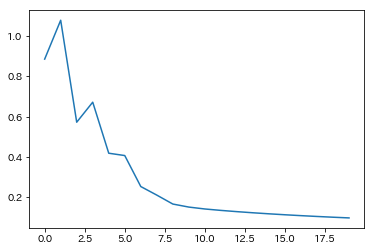

In [25]:
plt.plot(losses)
plt.show()

In [15]:
"""
モデルの作成
"""

# 線形結合の結果
h = net(X)

# シグモイド関数を作用させた結果は y=1 の確率を表す
prob = torch.sigmoid(h)  # prob = nn.functional.sigmoid(h)

# 確率が0.5以上のものをクラス1と予想し、それ以外を0とする
# PyTorch には Bool型がないので対応する型として ByteTensor が出力される
y_pred = prob > 0.5

# 予測結果の確認（y は FloatTensor なので ByteTensor に変換してから比較する）
(y.byte() == y_pred.view_as(y)).sum().item()

100

### 2.4.3 多クラスのロジスティック回帰

In [16]:
"""
10種類の手書きの数字のデータセットの分類問題
"""

from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
# CrossEntropyLoss 関数は y として int64型の Tensor を受け取るので注意
y = torch.tensor(y, dtype=torch.int64)

# 出力は10（クラス数）次元
net = nn.Linear(X.size()[1], 10)

# ソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

tensor([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,
         5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,
         0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.,  0.,  4.,
        11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,
         0.,  0.,  6., 13., 10.,  0.,  0.,  0.]) tensor(0)


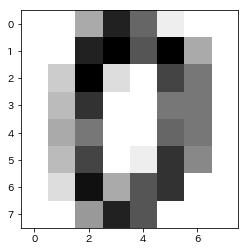

In [17]:
print( X[0], y[0] )
plt.imshow(X[0].view(8,8) / X[0].max(), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [18]:
"""
学習のイテレーション部分
"""

# 損失関数のログ
losses = []

# イテレーションを回す
for epoc in range(100):
    # 前回の backward メソッドで計算された勾配の値を削除
    optimizer.zero_grad()
    
    # 線形モデルで y の予測値の計算
    y_pred = net(X)
    
    # MSE loss と w による微分を計算
    loss = loss_fn(y_pred, y)
    loss.backward()
    
    # 勾配を更新する
    optimizer.step()
    
    # 収束確認のために loss を記録しておく
    losses.append(loss.item())

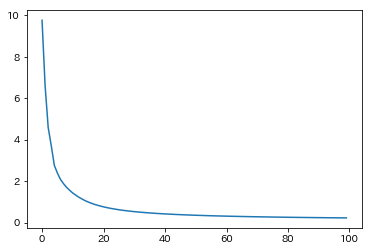

In [19]:
plt.plot(losses)
plt.show()

In [20]:
"""
正解率
"""

# torch.max は集計軸を指定すると最大値の他にその位置を返す
_, y_pred = torch.max(net(X), 1)

# 正解率を計算する
(y_pred == y).sum().item() / len(y)

0.9382303839732888